## PreProcessing

In [ ]:
import os
  # Adjust this path based on where your 'data' folder 
data_dir = '../data/Rice_Image_Dataset/'

  # List the contents to verify
if os.path.exists(data_dir):
    print(f"Data directory found: {data_dir}")
    print("Contents:", os.listdir(data_dir))
else:
    print(f"Error: Data directory not found at {data_dir}")

Data directory found: ../data/Rice_Image_Dataset/
Contents: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag', 'Rice_Citation_Request.txt', 'S0168169921003021.pdf']


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image dimensions and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# --- Data Augmentation Strategy ---
# Start with a baseline, then experiment!
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Normalize pixel values to [0, 1]
    validation_split=0.2,           # Use 20% of data for validation
    rotation_range=20,              # Rotate images by up to 20 degrees
    width_shift_range=0.2,          # Shift images horizontally
    height_shift_range=0.2,         # Shift images vertically
    shear_range=0.2,                # Apply shearing transformations
    horizontal_flip=True,           # Flip images horizontally
    fill_mode='nearest'             # Fill newly created pixels
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',       # For multi-class classification
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)

2025-05-28 13:17:16.522644: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-28 13:17:31.279505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748425654.973663    1340 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748425656.145689    1340 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748425666.529999    1340 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Class Names: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Number of Classes: 5


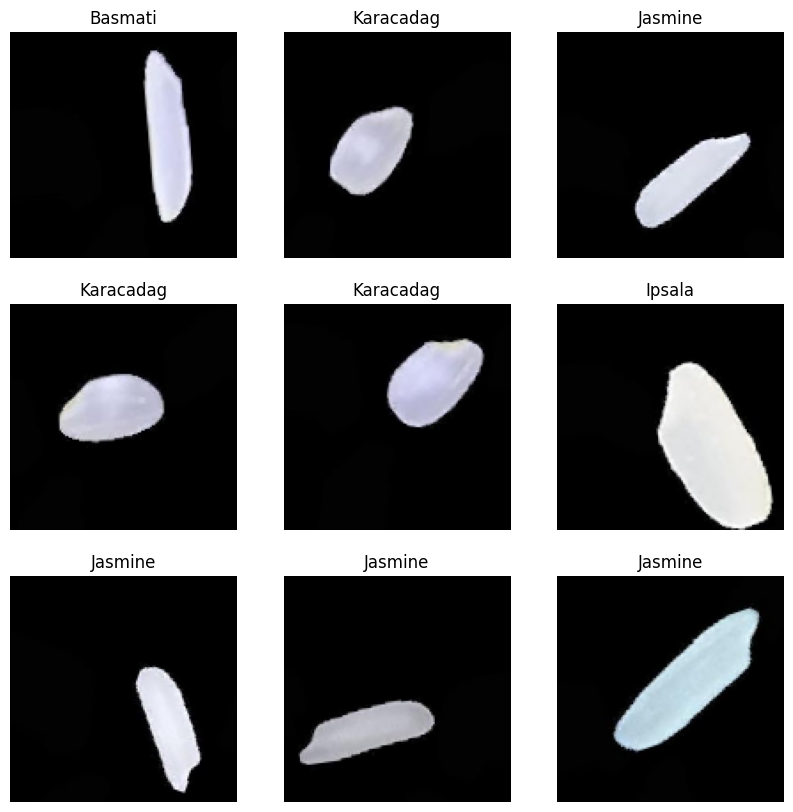

In [ ]:
from PIL import Image as pil_image # This Import is just for testing ac occured error that you might face it.(reinstall keras and it will work fine :) )
import matplotlib.pyplot as plt
import numpy as np

sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9): 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[np.argmax(sample_labels[i])])
    plt.axis("off")
plt.show()

## Architecture 1: Simple CNN 



In [4]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def build_simple_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(), # Added for stability and faster training
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5), # Regularization to prevent overfitting
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax') # Softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Example usage:

input_shape = (IMG_HEIGHT, IMG_WIDTH, 3) # 3 for RGB channels
model_simple_cnn = build_simple_cnn(input_shape, num_classes)
model_simple_cnn.summary()

/mnt/c/ali/Deep_Learning/Rice_Project/.new_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748425825.370288    1340 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:3b:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,181 (12.61 MB)

 Trainable params: 3,305,733 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

## Architecture 2: Deeper CNN (e.g., adding more layers, smaller filters)

In [5]:
def build_deeper_cnn(input_shape, num_classes):
      model = models.Sequential([
          layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'), # 'same' padding to preserve spatial dimensions
          layers.BatchNormalization(),
          layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Dropout(0.25),

          layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
          layers.BatchNormalization(),
          layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Dropout(0.25),

          layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
          layers.BatchNormalization(),
          layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Dropout(0.25),

          layers.Flatten(),
          layers.Dense(256, activation='relu'),
          layers.BatchNormalization(),
          layers.Dropout(0.5),
          layers.Dense(num_classes, activation='softmax')
      ])

      model.compile(optimizer=Adam(learning_rate=0.0005),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
      return model

model_deeper_cnn = build_deeper_cnn(input_shape, num_classes)
model_deeper_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,679,973 (33.11 MB)

 Trainable params: 8,678,565 (33.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

## Architecture 3: Transfer Learning (e.g., MobileNetV2, VGG16, ResNet50)

In [6]:
from tensorflow.keras.applications import MobileNetV2 # Or VGG16, ResNet50, EfficientNetB0 etc.
from tensorflow.keras.models import Model

def build_transfer_learning_model(input_shape, num_classes):
      # Load the pre-trained MobileNetV2 model without the top classification layer
      base_model = MobileNetV2(input_shape=input_shape,
                               include_top=False,
                               weights='imagenet')

      # Freeze the convolutional base layers
      base_model.trainable = False

      # Add custom classification layers on top
      x = base_model.output
      x = layers.GlobalAveragePooling2D()(x) # Reduces spatial dimensions, good for classification
      x = layers.Dense(128, activation='relu')(x)
      x = layers.Dropout(0.5)(x)
      outputs = layers.Dense(num_classes, activation='softmax')(x)

      model = Model(inputs=base_model.input, outputs=outputs)

      model.compile(optimizer=Adam(learning_rate=0.0001), # Lower learning rate for fine-tuning
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
      return model

model_transfer = build_transfer_learning_model(input_shape, num_classes)
model_transfer.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Train the Models

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks for better training
# EarlyStopping: Stops training if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# ModelCheckpoint: Saves the best model weights
model_checkpoint = ModelCheckpoint('best_model_simple_cnn_tf.h5', monitor='val_loss', save_best_only=True)




## --- Train Simple CNN ---

In [8]:

print("\n--- Training Simple CNN ---\n")
history_simple = model_simple_cnn.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)



--- Training Simple CNN ---



/mnt/c/ali/Deep_Learning/Rice_Project/.new_venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1748425841.525516    3443 service.cc:152] XLA service 0x7f6aa8002fc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748425841.525588    3443 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2025-05-28 13:20:42.884387: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748425844.704510    3443 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1748425868.280964    3443 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.5184 - loss: 1.3160

2025-05-28 13:36:15.325734: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_153', 4 bytes spill stores, 4 bytes spill loads



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 940s 485ms/step - accuracy: 0.5185 - loss: 1.3157 - val_accuracy: 0.5357 - val_loss: 2.2900
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.8100 - loss: 0.4735

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 823s 439ms/step - accuracy: 0.8100 - loss: 0.4735 - val_accuracy: 0.5811 - val_loss: 1.2750
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8588 - loss: 0.3777

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 877s 468ms/step - accuracy: 0.8588 - loss: 0.3777 - val_accuracy: 0.9165 - val_loss: 0.2061
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 854s 456ms/step - accuracy: 0.9109 - loss: 0.2645 - val_accuracy: 0.9277 - val_loss: 0.2215
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 878s 468ms/step - accuracy: 0.9418 - loss: 0.1796 - val_accuracy: 0.2255 - val_loss: 26.2180
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 812s 433ms/step - accuracy: 0.9392 - loss: 0.1895 - val_accuracy: 0.6717 - val_loss: 2.0266
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9518 - loss: 0.1566

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 844s 450ms/step - accuracy: 0.9518 - loss: 0.1566 - val_accuracy: 0.9889 - val_loss: 0.0406
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 818s 436ms/step - accuracy: 0.9584 - loss: 0.1353 - val_accuracy: 0.9711 - val_loss: 0.0977
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 808s 431ms/step - accuracy: 0.9617 - loss: 0.1272 - val_accuracy: 0.9658 - val_loss: 0.1239
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 811s 432ms/step - accuracy: 0.9656 - loss: 0.1127 - val_accuracy: 0.8573 - val_loss: 0.7531


## --- Train Deeper CNN ---

In [ ]:

print("\n--- Training Deeper CNN ---\n")
model_checkpoint_deeper = ModelCheckpoint('best_model_deeper_cnn_tf.h5', monitor='val_loss', save_best_only=True)
history_deeper = model_deeper_cnn.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint_deeper]
)




--- Training Deeper CNN ---

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.8617 - loss: 0.4056

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 846s 441ms/step - accuracy: 0.8617 - loss: 0.4054 - val_accuracy: 0.7346 - val_loss: 0.8724
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9741 - loss: 0.0751

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1221s 651ms/step - accuracy: 0.9741 - loss: 0.0751 - val_accuracy: 0.7888 - val_loss: 0.5979
Epoch 3/10
1538/1875 ━━━━━━━━━━━━━━━━━━━━ 2:04 368ms/step - accuracy: 0.9807 - loss: 0.0577


KeyboardInterrupt



## --- Train Transfer Learning Model ---

In [ ]:

print("\n--- Training Transfer Learning Model (MobileNetV2) ---\n")
model_checkpoint_transfer = ModelCheckpoint('best_model_transfer_tf.h5', monitor='val_loss', save_best_only=True)
history_transfer = model_transfer.fit(
    train_generator,
    epochs=6,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint_transfer]
)

## Evaluate Models and Plot Results

In [ ]:
def plot_training_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.show()

# Plot histories for each model
plot_training_history(history_simple, "Simple CNN")
plot_training_history(history_deeper, "Deeper CNN")
plot_training_history(history_transfer, "Transfer Learning (MobileNetV2)")

# Evaluate models on validation data
print("\n--- Model Evaluation ---")
loss_simple, acc_simple = model_simple_cnn.evaluate(validation_generator)
print(f"Simple CNN - Validation Accuracy: {acc_simple:.4f}, Loss: {loss_simple:.4f}")

loss_deeper, acc_deeper = model_deeper_cnn.evaluate(validation_generator)
print(f"Deeper CNN - Validation Accuracy: {acc_deeper:.4f}, Loss: {loss_deeper:.4f}")

loss_transfer, acc_transfer = model_transfer.evaluate(validation_generator)
print(f"Transfer Learning - Validation Accuracy: {acc_transfer:.4f}, Loss: {loss_transfer:.4f}")

# Load the best saved models for final evaluation
# from tensorflow.keras.models import load_model
# best_simple_cnn = load_model('best_model_simple_cnn.h5')
# ... and then evaluate them

## Test with Sample Images

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

def predict_single_image(model, img_path, class_names, img_height, img_width):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Create a batch
    img_array = img_array / 255.0 # Rescale pixels

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_index]
    confidence = np.max(predictions[0])

    plt.imshow(mpimg.imread(img_path))
    plt.title(f"Predicted: {predicted_class_name} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

    print(f"Image: {img_path}")
    print(f"Predicted Class: {predicted_class_name}")
    print(f"Confidence: {confidence:.2f}")


sample_images, sample_labels = next(validation_generator)
first_image_in_batch = sample_images[0]
true_label_index = np.argmax(sample_labels[0])
true_label_name = class_names[true_label_index]
 
test_image_path = '/content/drive/MyDrive/data/Rice_data/Arborio/Arborio (1).jpg'
if os.path.exists(test_image_path):
    print("\n--- Testing with a Sample Image (using best model) ---")
    # Choose your best performing model
    predict_single_image(model_transfer, test_image_path, class_names, IMG_HEIGHT, IMG_WIDTH)
else:
    print(f"Test image not found at {test_image_path}. Please update the path.")

